# Transforming Data with Pandas

### About
In this lesson, we'll continue working with the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness) and explore another aspect of it that we haven't analyzed yet - the factors that contribute to happiness. 

### Goal
Throughout this lesson, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this lesson:

`Which of the factors above contribute the most to the happiness score?`

In order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

- Series.map()
- Series.apply()
- DataFrame.applymap()
- DataFrame.apply()
- pd.melt()



### Dataset
The dataset is from [World Happiness Report for 2015](https://www.kaggle.com/unsdsn/world-happiness), a CSV file called `World_Happiness_2015.csv`. Here are the descriptions for some of the columns we'll be working with:

- `Country` — name of the country
- `Region` — name of the region the country belongs to
- `Happiness Rank` — the rank of the country, as determined by its happiness score
- `Happiness Score` — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Family` — the estimated extent to which family contributes to the happiness score
- `Freedom` — the estimated extent to which freedom contributes to the happiness score
- `Generosity` — the estimated extent to which generosity contributes to the happiness score
- `Dystopia Residual`- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column  you won't need in depth knowledge of it to complete this lesson.

### 1. Introduction

Recall that the 2015 World Happiness Report is saved to a variable named `happiness2015`. We also created a dictionary named `mapping` for renaming columns.

1. Use the `DataFrame.rename()` method to change the `'Economy (GDP per Capita)'`, `'Health (Life Expectancy)'`, and `'Trust (Government Corruption)'` column names to the names specified in the `mapping` dictionary.
   - Pass the `mapping` dictionary into the `df.rename()` method and set the `axis` parameter to `1`.
   - Assign the result back to happiness2015.

In [1]:
import pandas as pd
happiness2015=pd.read_csv('World_Happiness_2015.csv')
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015=happiness2015.rename(mapping,axis=1)
happiness2015.columns
# assign back to happiness2015

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### 2. Apply a Function Element-Wise Using the Map and Apply Methods
1. Use the `Series.map()` method to apply the `label` function to the `Economy` column in `happiness2015`. Assign the result to `economy_impact_map`.
2. Use the `Series.apply()` method to apply the `label` function to the `Economy` column. Assign the result to `economy_impact_apply`.
3. Use the following code to check if the methods produce the same result: `economy_impact_map.equals(economy_impact_apply)`. Assign the result to a variable named `equal`.

In [3]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map=happiness2015['Economy'].map(label)
economy_impact_apply=happiness2015['Economy'].apply(label)
equal=economy_impact_map.equals(economy_impact_apply)
print(equal)

True


### 3. Apply a Function Element-Wise Using the Map and Apply Methods Continued
- Update `label` to take in another argument named `x`. If the `element` is greater than `x`, return `'High'`. Otherwise, return `'Low'`.
- Then, use the `apply` method to apply `label` to the `Economy` column and set the `x` argument to `0.8`. Save the result back to `economy_impact_apply`.

In [4]:
def label(element,x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label,x=.8)

in_between=happiness2015[(happiness2015['Economy']>.8) & (happiness2015['Economy']<1)]['Economy'].index
check_x_is_applied=all(x in list(economy_impact_apply.index) for x in list(in_between))
print(check_x_is_applied)
# Check condition "value in 0.8~1" is applied

True


### 4. Apply a Function Element-Wise to Multiple Columns Using Applymap Method
If we wanted to transform more than one column, pandas already has a method that can apply functions element-wise to multiple columns at once - the `DataFrame.applymap()` method. Just like with the `Series.map()` and `Series.apply()` methods, we need to pass the function name into the `df.applymap()` method without parentheses.
- Use the `df.applymap()` method to apply the label function to the columns saved in factors in `happiness2015`. Assign the result to `factors_impact`.


In [6]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact=happiness2015[factors].applymap(label)
print(factors_impact)

    Economy Family Health Freedom Trust Generosity
0      High   High    Low     Low   Low        Low
1      High   High    Low     Low   Low        Low
2      High   High    Low     Low   Low        Low
3      High   High    Low     Low   Low        Low
4      High   High    Low     Low   Low        Low
..      ...    ...    ...     ...   ...        ...
153     Low    Low    Low     Low   Low        Low
154     Low    Low    Low     Low   Low        Low
155     Low    Low    Low     Low   Low        Low
156     Low    Low    Low     Low   Low        Low
157     Low    Low    Low     Low   Low        Low

[158 rows x 6 columns]


### 5. Apply Functions Along an Axis Using the Apply Method
Note
- `Serious.map()`, `Serious.apply()` and `Dataframe.applymap()` are applying function element-wise.
- `df.apply()` method applies functions along an axis, either column-wise or row-wise
- If we tried to use the `df.apply()` method to apply a function that works element-wise to multiple columns, we'd get an error.

Instruction
1. Create a function that calculates the percentage of `'High'` and `'Low'` values in each column.
   - Create a function named `v_counts` that accepts one parameter called `col`.
   - Use the `Series.value_counts()` method to calculate the value counts for col. Assign the result to `num`.
   - Use the `Series.size` attribute to calculate the number of rows in the column. Assign the result to `den`.
   - Divide `num` by `den` and return the result.
2. Use the `df.apply()` method to apply the `v_counts` function to all of the columns in `factors_impact`. Assign the result to `v_counts_pct`.

In [9]:
def v_counts(col):
    num=col.value_counts()
    den=col.size
    return num/den

v_counts_pct=factors_impact.apply(v_counts)
print(factors_impact.describe())
print(v_counts_pct)
# caculate percentage of High and Low

       Economy Family Health Freedom Trust Generosity
count      158    158    158     158   158        158
unique       2      2      2       1     1          1
top        Low   High    Low     Low   Low        Low
freq        92     89    156     158   158        158
       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


### 6. Apply Functions Along an Axis Using the Apply Method Continued

In general, we should only use the apply() method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the apply() method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the apply() method.

Instruction
1. Create a function that converts each of the six factor columns and the `Dystopia Residual` column to `percentages`.
   - Create a function named `percentages` that accepts one parameter called `col`.
   - Divide `col` by the `Happiness Score` column. Assign the result to `div`.
   - Multiply `div` by `100` and return the result.
2. Use the `df.apply()` method to apply the `percentages` function to all of the columns in `factors`. Assign the result to `factor_percentages`.

In [10]:
def percentages(col):
    div=col/happiness2015['Happiness Score']
    return div*100
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
factor_percentages=happiness2015[factors].apply(percentages)

### 7. Reshaping Data with the Melt Function
1. Use the `melt` function to reshape ``happiness2015``. The columns listed in `main_cols` should stay the same. The columns listed in `factors` should be transformed into rows. Assign the result to a variable called melt.
2. Convert the `value` column to a percentage.
   - Divide the `value` column by the` Happiness Score` column and multiply the result by `100`.
   - Use the `round()` function to round the result to 2 decimal places.
   - Assign the result to a new column called `Percentage`.

In [11]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

### 8. Challenge: Aggregate the Data and Create a Visualization
We use the melt function to reshape our data so that we could use vectorized operations to convert the value column into percentages.
You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as [tidy data](https://www.jstatsoft.org/article/view/v059i10).

Instructions
1. Use the `df.pivot_table()` method to create a pivot table from the `melt` dataframe. Set the `variable` column as the `index` and the `value` column as the `values`. Assign the result to `pv_melt`.
2. Use the `df.plot()` method to create a pie chart of the results. Set the kind parameter to `'pie'`, the y parameter to `'value'`, and the `legend` parameter to `False`, so we can better see the results.
3. If we disregard `Dystopia Residual`, which two factors, on average, contribute the most to the happiness score?

<AxesSubplot:ylabel='value'>

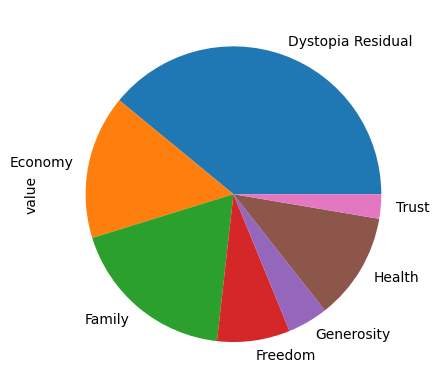

In [15]:
pv_melt=melt.pivot_table(index='variable',values='value')
pv_melt.plot(kind='pie',y='value',legend=False)
# Economy and Family are the two major factors contributed the most to Happiness Score if we disregard `Dystopia Residual`